# Customer Segmentation Using Kmeans Clustering

In this project I will find the number of customer segements in a data set of Mall Customers. This is an important problem to solve in online marketing so you can target similar customers to get a higher click through rate and conversion rate. This could also be used in feature engineering for other ML algorithims such as recomendation engines.

github repo: https://github.com/Trent-Kindvall/Customer-Segmentation

In [43]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
os.environ["OMP_NUM_THREADS"] = '1'

### Exploratory Data Analysis and Cleaning (EDA)
The first step is to read in the data and use the pandas describe function to take a look at the features of the dataset.

In [44]:
df = pd.read_csv('data/Mall_Customers.csv',index_col='CustomerID')
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score' })
print(df.dtypes)
df.describe()

Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object


,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


This shows that there is no missing data but we are missing the gender column. This is because it is not a integer. For K-means clustering we need all features to be integers so I will map male to 1 and female to 0 so that we can utilize the feature for training.


In [45]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.describe()

,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


The next step in the EDA process is to look at the featues and see how they break down and if there is an obvious corelations between the features.

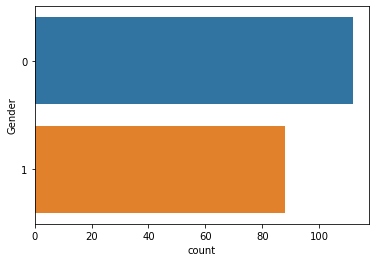

In [46]:
fig = plt.figure()
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
fig.patch.set_facecolor('white')
plt.show()

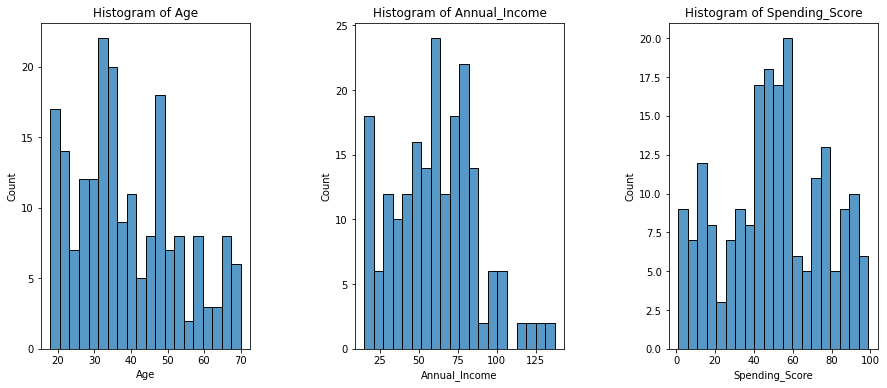

In [47]:
fig = plt.figure(1 , figsize = (15 , 6))
n = 0 
fig.patch.set_facecolor('white')
for x in ['Age' , 'Annual_Income' , 'Spending_Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Histogram of {}'.format(x))
plt.show()

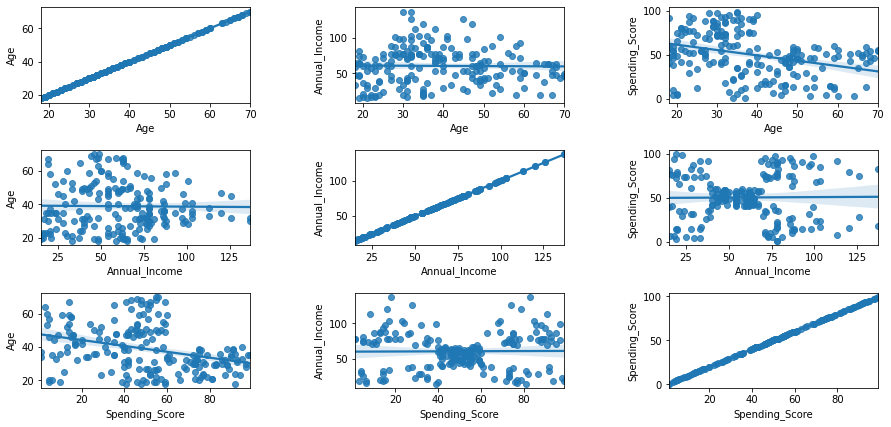

In [48]:
fig = plt.figure(1 , figsize = (15 , 7))
fig.patch.set_facecolor('white')
n = 0 
for x in ['Age' , 'Annual_Income' , 'Spending_Score']:
    for y in ['Age' , 'Annual_Income' , 'Spending_Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

While the graphs above show that there is a good distribution of data between the features the correlations are relativly low. This is interesting and will hopefully allow us to still find good clusters.

### Example 2D Cluster
While we will use all the features to model the final clusters with more than 2 dimentions the graphing gets very difficult and harder to see. So I will do a 2d Clustering example with Annual Income and Spending Score to demonstaite how the alogorthim works. In the code and graph below we use sklearn's K-means function to create a model with 5 centroids. This means that we belive there is 5 cluster centers that would accurately group the data points. But how do we know if this is a good number to chose from? It looks like the number of clusters is correct, as the points fit relativly nicely into the points availble. Also how are we going to do more than 2 features at a time? We will look at both of those problems in the next sections 

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


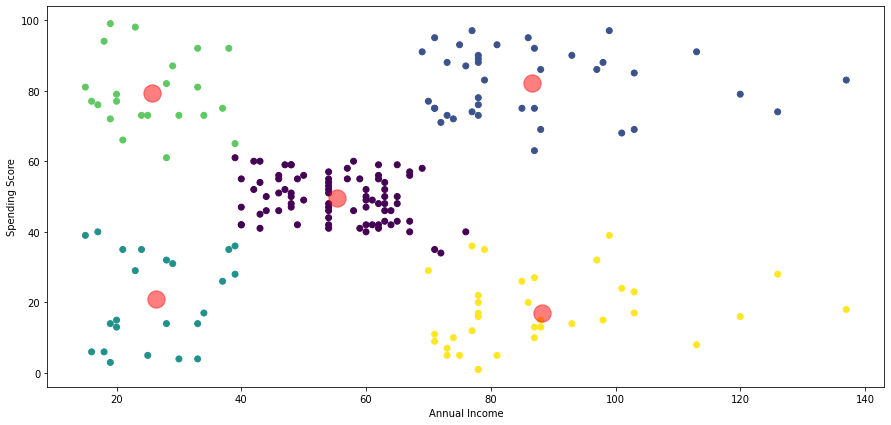

In [49]:
fig = plt.figure(1 , figsize = (15 , 7))
fig.patch.set_facecolor('white')
X_2d =  df[['Annual_Income' , 'Spending_Score']]
km = KMeans(n_clusters=5,n_init=10)
y_2d = km.fit_predict(X_2d)
centroids_2d = km.cluster_centers_

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
plt.scatter( x = X_2d['Annual_Income'] ,y = X_2d['Spending_Score']  , c = y_2d)
plt.scatter(x = centroids_2d[: , 0] , y =  centroids_2d[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Annual Income')
plt.show()


### Evaluation and Results

K-means models have two popular ways to evaluate if we are using the correct number of centroids. The easist is the Elbow method and slightly more robust method is called Silhouette Coefficient. The Elbow method looks at the total Sum of Squared Distance (SSE) values for all reasonable number of clusters. When you graph the SSE values against the number of centroid you can see if there is a elbow in the graph. If the graph has en elbow you can be pretty certain that the elbow marks the best number of centroids for the dataset.Silhouette Coefficent gives the ratio between the average distance from all the points in the same cluster and the average distance from all the data points in the closest cluster. This gives us an easy way to see how well the data points are being grouped and if they are apart of the correct groups.

In [50]:
inertia= np.zeros(10)

for n in range(2,12):
    k = KMeans(n_clusters=n,n_init=10)
    k.fit(df)
    y = k.predict(df)
    silhouette_vals = silhouette_samples(df, y)
    inertia[n-2] = k.inertia_


C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmea

### Elbow Method

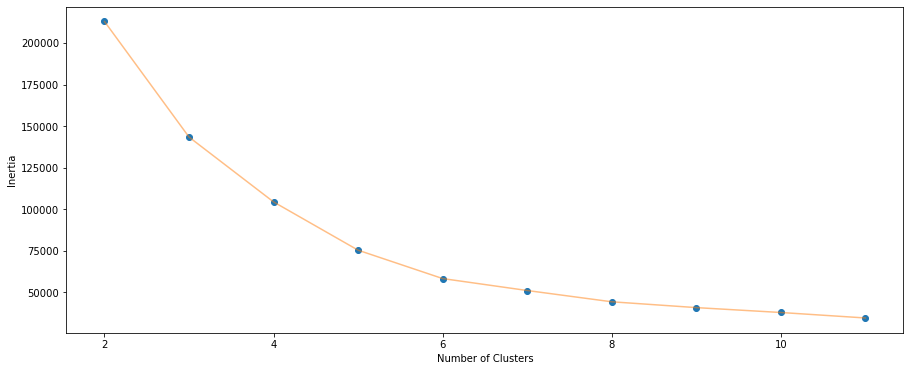

In [51]:
fig = plt.figure(1 , figsize = (15 ,6))
fig.patch.set_facecolor('white')
plt.plot(np.arange(2 , 12) , inertia , 'o')
plt.plot(np.arange(2 , 12) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


As you can see there graph is monotonically decreasing and does not have an elbow so we can not use this as judge what a good number of centroids is.

### Silhouette Coeffecient

The Silhouette Coefficent is calculated by:

ai: the average distance from all data points in the same cluster

bi: the average distance from all data points in the closest cluster

$$\frac{bi-ai}{max(ai,bi)}$$

In this notebook we will use the Kmeans function that already exists silhouette_samples.
This calculates the coeffcients for us all we have to do is average them to get the model coeffcient.

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


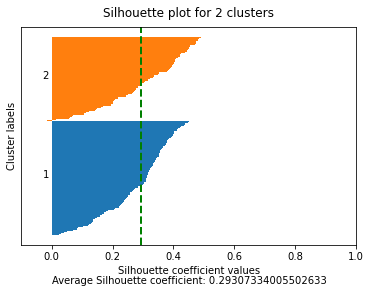

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


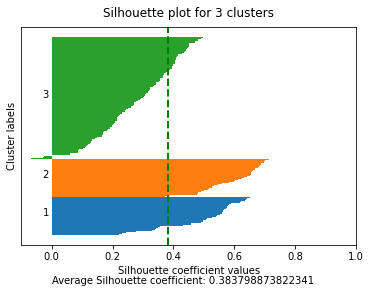

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


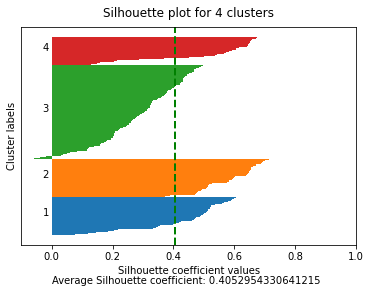

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


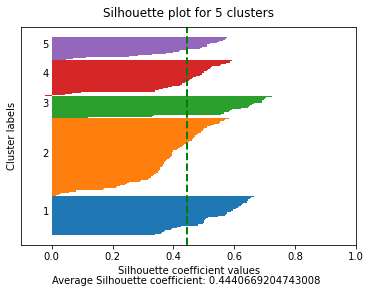

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


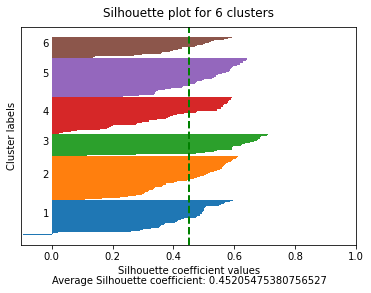

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


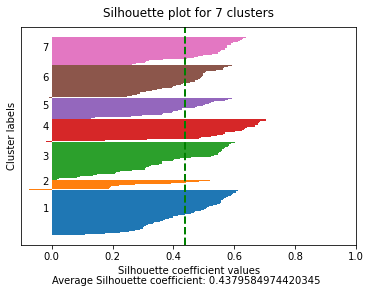

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


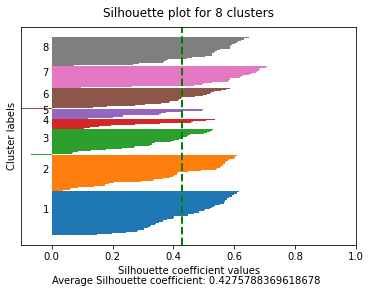

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


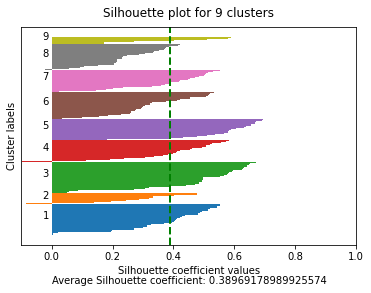

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


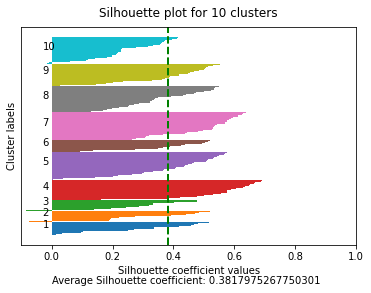

C:\Users\tgkin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


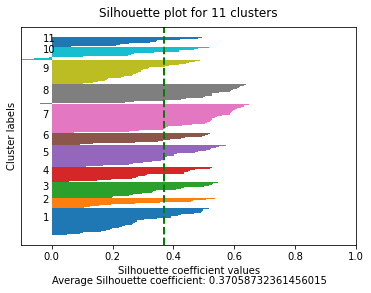

In [52]:


for n in range(2,12):
    k = KMeans(n_clusters=n,n_init=10)
    k.fit(df)
    y = k.predict(df)
    silhouette_vals = silhouette_samples(df, y)


    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(y)):
        cluster_silhouette_vals = silhouette_vals[y == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    fig = plt.figure(1 , figsize = (15 ,6))
    fig.patch.set_facecolor('white')
    avg_score = np.mean(silhouette_vals)
    plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.title('Silhouette plot for {} clusters'.format(n), y=1.02)
    plt.text(0,-50,'Average Silhouette coefficient: {}'.format(avg_score))
    plt.show()

As you can see here the Silouette coefficeint peaks at clusters = .452 and on a scale of -1 to 1 this is a strong correlation but not excelent. I think with more features we could increase the coeffecient to over .75 and have a very good model for segmenting the customer base. But even with the current model I think we could test use it to find the best customer segments selling products.